# Hyperparameter Tuning - Feature Selection

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from numpy import asarray
from sklearn.metrics import mean_absolute_error

In [20]:
"""
Resource 1
"""
def create_model(n, optimizer, dropout_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(n,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])
    
    return model

## Splitting the Data

In [4]:
y = pd.read_csv('y.csv')

In [5]:
# f-score regression
x1_fregression = pd.read_csv('x1_fregression.csv')
n = len(x1_fregression.columns)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1_fregression, y, test_size=0.2, random_state=42)
X_train1.shape, X_test1.shape

((728, 16), (182, 16))

In [6]:
# Mutual Info Regression
x2_mutualinforegression = pd.read_csv('x2_mutualinforegression.csv')
# n = len(x2_mutualinforegression.columns)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2_mutualinforegression, y, test_size=0.2, random_state=42)
X_train2.shape, X_test2.shape

((728, 16), (182, 16))

In [7]:
# Tree-based Selection
x3_treebased = pd.read_csv('x3_treebased.csv')
# n = len(x3_treebased.columns)
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3_treebased, y, test_size=0.2, random_state=42)
X_train3.shape, X_test3.shape

((728, 16), (182, 16))

In [8]:
# PCA
x3_pca = pd.read_csv('x4_pca.csv')
# n = len(x3_pca.columns)
X_train4, X_test4, y_train4, y_test4 = train_test_split(x3_pca, y, test_size=0.2, random_state=42)
X_train4.shape, X_test4.shape

((728, 16), (182, 16))

## Feature Selection Method
Testing feature selections: f_regression, mutual_info_regression, tree_base, PCA 

### f_regression

In [9]:
"""
Resource 2
"""
model_feature1 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_feature1 = model_feature1.fit(X_train1,
                                      y_train1,
                                      validation_split = 0.2,
                                      epochs=200,
                                      batch_size=5,
                                      verbose=1
                                     )

Epoch 1/200
117/117 [==============================] - 1s 5ms/step - loss: 917.5565 - mae: 6.2414 - val_loss: 841.4586 - val_mae: 7.7177

Epoch 00001: val_loss improved from inf to 841.45862, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 913.6404 - mae: 6.2013 - val_loss: 837.9047 - val_mae: 7.6726

Epoch 00002: val_loss improved from 841.45862 to 837.90472, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 908.3355 - mae: 6.1703 - val_loss: 832.6071 - val_mae: 7.6320

Epoch 00003: val_loss improved from 837.90472 to 832.60706, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 4/200
117/117 [==============================] - 0s 1ms/step - loss: 902.0119 - mae: 6.1387 - val_loss: 820.6979 - val

Epoch 29/200
117/117 [==============================] - 0s 2ms/step - loss: 253.3027 - mae: 3.7299 - val_loss: 185.3913 - val_mae: 3.7424

Epoch 00029: val_loss improved from 188.47150 to 185.39133, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 30/200
117/117 [==============================] - 0s 2ms/step - loss: 221.5494 - mae: 3.7155 - val_loss: 183.1050 - val_mae: 3.7066

Epoch 00030: val_loss improved from 185.39133 to 183.10497, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 31/200
117/117 [==============================] - 0s 2ms/step - loss: 221.6688 - mae: 3.6568 - val_loss: 179.5691 - val_mae: 3.6528

Epoch 00031: val_loss improved from 183.10497 to 179.56914, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 32/200
117/117 [==============================] - 0s 1ms/step - loss: 229.5561 - mae: 3.6550 - val_loss: 180.

117/117 [==============================] - ETA: 0s - loss: 46.5397 - mae: 1.92 - 0s 2ms/step - loss: 40.8165 - mae: 1.8816 - val_loss: 287.5176 - val_mae: 3.8070

Epoch 00108: val_loss did not improve from 152.25365
Epoch 109/200
117/117 [==============================] - 0s 2ms/step - loss: 50.4365 - mae: 2.0746 - val_loss: 285.8589 - val_mae: 3.7613

Epoch 00109: val_loss did not improve from 152.25365
Epoch 110/200
117/117 [==============================] - 0s 2ms/step - loss: 39.4905 - mae: 1.9782 - val_loss: 284.7458 - val_mae: 3.7614

Epoch 00110: val_loss did not improve from 152.25365
Epoch 111/200
117/117 [==============================] - 0s 2ms/step - loss: 59.2480 - mae: 2.1999 - val_loss: 295.8031 - val_mae: 3.8315

Epoch 00111: val_loss did not improve from 152.25365
Epoch 112/200
117/117 [==============================] - 0s 2ms/step - loss: 49.5290 - mae: 2.1065 - val_loss: 264.2427 - val_mae: 3.6264

Epoch 00112: val_loss did not improve from 152.25365
Epoch 113/200
11


Epoch 00150: val_loss did not improve from 152.25365
Epoch 151/200
117/117 [==============================] - 0s 2ms/step - loss: 52.6003 - mae: 2.1497 - val_loss: 355.8800 - val_mae: 4.0961

Epoch 00151: val_loss did not improve from 152.25365
Epoch 152/200
117/117 [==============================] - 0s 2ms/step - loss: 31.5644 - mae: 1.9086 - val_loss: 350.2558 - val_mae: 4.0550

Epoch 00152: val_loss did not improve from 152.25365
Epoch 153/200
117/117 [==============================] - 0s 1ms/step - loss: 54.3188 - mae: 2.1302 - val_loss: 341.0973 - val_mae: 3.9789

Epoch 00153: val_loss did not improve from 152.25365
Epoch 154/200
117/117 [==============================] - 0s 2ms/step - loss: 41.8846 - mae: 1.9910 - val_loss: 305.8737 - val_mae: 3.7536

Epoch 00154: val_loss did not improve from 152.25365
Epoch 155/200
117/117 [==============================] - 0s 2ms/step - loss: 41.2964 - mae: 2.0350 - val_loss: 286.3793 - val_mae: 3.6787

Epoch 00155: val_loss did not improve f

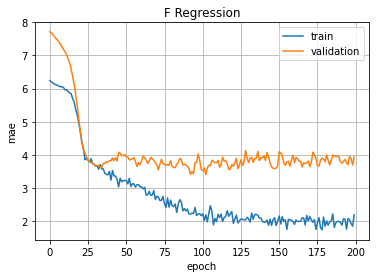

6/6 [==============================] - 0s 1ms/step - loss: 205.9358 - mae: 2.5960


[205.93580627441406, 2.596035957336426]

In [10]:
"""
Resource 3
"""
plt.plot(history_feature1.history['mae'])
plt.plot(history_feature1.history['val_mae'])
plt.title('F Regression')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_feature1 = model_feature1.evaluate(X_test1, y_test1, verbose=1)
score_feature1

### mutual_info_regression

In [11]:
"""
Resource 2
"""
model_feature2 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_feature2 = model_feature2.fit(X_train2,
                                      y_train2,
                                      validation_split = 0.2,
                                      epochs=200,
                                      batch_size=5,
                                      verbose=1)

Epoch 1/200
117/117 [==============================] - 1s 2ms/step - loss: 917.9519 - mae: 6.2369 - val_loss: 839.5366 - val_mae: 7.7147

Epoch 00001: val_loss improved from inf to 839.53662, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 2/200
117/117 [==============================] - 0s 1ms/step - loss: 913.0252 - mae: 6.1849 - val_loss: 834.8492 - val_mae: 7.6670

Epoch 00002: val_loss improved from 839.53662 to 834.84918, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 3/200
117/117 [==============================] - 0s 1ms/step - loss: 909.4551 - mae: 6.1511 - val_loss: 827.3199 - val_mae: 7.6136

Epoch 00003: val_loss improved from 834.84918 to 827.31989, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 4/200
117/117 [==============================] - 0s 1ms/step - loss: 904.4914 - mae: 6.1369 - val_loss: 819.1259 - val

Epoch 29/200
117/117 [==============================] - 0s 1ms/step - loss: 277.7225 - mae: 4.1042 - val_loss: 189.3758 - val_mae: 3.9399

Epoch 00029: val_loss improved from 201.33170 to 189.37579, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 30/200
117/117 [==============================] - 0s 2ms/step - loss: 253.8865 - mae: 3.9358 - val_loss: 182.7982 - val_mae: 3.8090

Epoch 00030: val_loss improved from 189.37579 to 182.79823, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 31/200
117/117 [==============================] - 0s 2ms/step - loss: 243.6349 - mae: 3.8997 - val_loss: 179.2297 - val_mae: 3.7239

Epoch 00031: val_loss improved from 182.79823 to 179.22966, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 32/200
117/117 [==============================] - 0s 1ms/step - loss: 210.4612 - mae: 3.6749 - val_loss: 175.

117/117 [==============================] - 0s 1ms/step - loss: 84.3874 - mae: 2.4483 - val_loss: 185.9137 - val_mae: 3.5230

Epoch 00110: val_loss did not improve from 166.52979
Epoch 111/200
117/117 [==============================] - 0s 1ms/step - loss: 54.1517 - mae: 2.2077 - val_loss: 195.3241 - val_mae: 3.5499

Epoch 00111: val_loss did not improve from 166.52979
Epoch 112/200
117/117 [==============================] - 0s 1ms/step - loss: 77.7814 - mae: 2.2939 - val_loss: 227.7188 - val_mae: 3.7387

Epoch 00112: val_loss did not improve from 166.52979
Epoch 113/200
117/117 [==============================] - 0s 1ms/step - loss: 84.8510 - mae: 2.4444 - val_loss: 214.8880 - val_mae: 3.6388

Epoch 00113: val_loss did not improve from 166.52979
Epoch 114/200
117/117 [==============================] - 0s 1ms/step - loss: 63.0571 - mae: 2.2353 - val_loss: 238.6081 - val_mae: 3.7874

Epoch 00114: val_loss did not improve from 166.52979
Epoch 115/200
117/117 [==============================]

117/117 [==============================] - 0s 1ms/step - loss: 33.2127 - mae: 1.8703 - val_loss: 305.9335 - val_mae: 3.8238

Epoch 00153: val_loss did not improve from 166.52979
Epoch 154/200
117/117 [==============================] - 0s 1ms/step - loss: 34.3801 - mae: 1.8705 - val_loss: 272.3516 - val_mae: 3.6231

Epoch 00154: val_loss did not improve from 166.52979
Epoch 155/200
117/117 [==============================] - 0s 1ms/step - loss: 31.0594 - mae: 1.8676 - val_loss: 322.5259 - val_mae: 3.9001

Epoch 00155: val_loss did not improve from 166.52979
Epoch 156/200
117/117 [==============================] - 0s 1ms/step - loss: 67.4656 - mae: 2.2934 - val_loss: 319.3082 - val_mae: 3.9066

Epoch 00156: val_loss did not improve from 166.52979
Epoch 157/200
117/117 [==============================] - 0s 1ms/step - loss: 49.3959 - mae: 2.1713 - val_loss: 286.7514 - val_mae: 3.7309

Epoch 00157: val_loss did not improve from 166.52979
Epoch 158/200
117/117 [==============================]

117/117 [==============================] - 0s 1ms/step - loss: 40.2147 - mae: 1.9473 - val_loss: 334.9751 - val_mae: 3.9894

Epoch 00196: val_loss did not improve from 166.52979
Epoch 197/200
117/117 [==============================] - 0s 1ms/step - loss: 35.1909 - mae: 1.9000 - val_loss: 288.8389 - val_mae: 3.7626

Epoch 00197: val_loss did not improve from 166.52979
Epoch 198/200
117/117 [==============================] - 0s 1ms/step - loss: 45.0639 - mae: 1.8130 - val_loss: 296.6412 - val_mae: 3.7957

Epoch 00198: val_loss did not improve from 166.52979
Epoch 199/200
117/117 [==============================] - 0s 1ms/step - loss: 41.9490 - mae: 1.8619 - val_loss: 310.8045 - val_mae: 3.8681

Epoch 00199: val_loss did not improve from 166.52979
Epoch 200/200
117/117 [==============================] - 0s 1ms/step - loss: 35.0493 - mae: 1.8268 - val_loss: 317.2328 - val_mae: 3.8833

Epoch 00200: val_loss did not improve from 166.52979


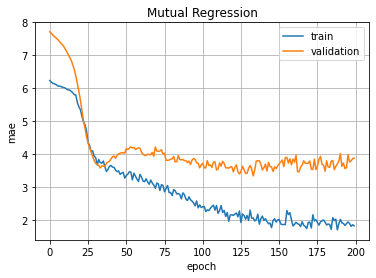

6/6 [==============================] - 0s 1ms/step - loss: 226.3756 - mae: 2.5705


[226.37564086914062, 2.5704758167266846]

In [12]:
"""
Resource 3
"""
plt.plot(history_feature2.history['mae'])
plt.plot(history_feature2.history['val_mae'])
plt.title('Mutual Regression')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_feature2 = model_feature2.evaluate(X_test2, y_test2, verbose=1)
score_feature2

### tree_based

In [13]:
"""
Resource 2
"""
model_feature3 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_feature3 = model_feature3.fit(X_train3,
                                      y_train3,
                                      validation_split = 0.2,
                                      epochs=200,
                                      batch_size=5,
                                      verbose=1
                                     )

Epoch 1/200
117/117 [==============================] - 1s 2ms/step - loss: 921.2223 - mae: 6.2617 - val_loss: 845.0234 - val_mae: 7.7728

Epoch 00001: val_loss improved from inf to 845.02344, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 918.5587 - mae: 6.2307 - val_loss: 840.3612 - val_mae: 7.7277

Epoch 00002: val_loss improved from 845.02344 to 840.36121, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 916.3776 - mae: 6.2081 - val_loss: 837.5096 - val_mae: 7.6976

Epoch 00003: val_loss improved from 840.36121 to 837.50958, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 4/200
117/117 [==============================] - 0s 1ms/step - loss: 911.9596 - mae: 6.1813 - val_loss: 834.1262 - val

Epoch 29/200
117/117 [==============================] - 0s 2ms/step - loss: 473.7675 - mae: 4.5442 - val_loss: 332.7268 - val_mae: 4.6522

Epoch 00029: val_loss improved from 364.87381 to 332.72684, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 30/200
117/117 [==============================] - 0s 1ms/step - loss: 457.3177 - mae: 4.4254 - val_loss: 302.7549 - val_mae: 4.3875

Epoch 00030: val_loss improved from 332.72684 to 302.75494, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 31/200
117/117 [==============================] - 0s 1ms/step - loss: 439.4250 - mae: 4.3028 - val_loss: 277.9428 - val_mae: 4.1274

Epoch 00031: val_loss improved from 302.75494 to 277.94278, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 32/200
117/117 [==============================] - 0s 1ms/step - loss: 408.4540 - mae: 4.1678 - val_loss: 254.


Epoch 00107: val_loss did not improve from 167.63728
Epoch 108/200
117/117 [==============================] - 0s 1ms/step - loss: 102.3862 - mae: 2.6326 - val_loss: 182.0730 - val_mae: 3.6538

Epoch 00108: val_loss did not improve from 167.63728
Epoch 109/200
117/117 [==============================] - 0s 1ms/step - loss: 111.0960 - mae: 2.6431 - val_loss: 199.6575 - val_mae: 3.7960

Epoch 00109: val_loss did not improve from 167.63728
Epoch 110/200
117/117 [==============================] - 0s 1ms/step - loss: 91.3920 - mae: 2.6812 - val_loss: 210.7644 - val_mae: 3.8666

Epoch 00110: val_loss did not improve from 167.63728
Epoch 111/200
117/117 [==============================] - 0s 2ms/step - loss: 90.7281 - mae: 2.6627 - val_loss: 202.1056 - val_mae: 3.8011

Epoch 00111: val_loss did not improve from 167.63728
Epoch 112/200
117/117 [==============================] - 0s 2ms/step - loss: 103.3019 - mae: 2.6028 - val_loss: 219.3657 - val_mae: 3.9438

Epoch 00112: val_loss did not improv


Epoch 00192: val_loss did not improve from 167.63728
Epoch 193/200
117/117 [==============================] - 0s 1ms/step - loss: 93.2846 - mae: 2.5821 - val_loss: 222.1268 - val_mae: 3.7613

Epoch 00193: val_loss did not improve from 167.63728
Epoch 194/200
117/117 [==============================] - 0s 1ms/step - loss: 69.0774 - mae: 2.2376 - val_loss: 222.9203 - val_mae: 3.7505

Epoch 00194: val_loss did not improve from 167.63728
Epoch 195/200
117/117 [==============================] - 0s 1ms/step - loss: 86.2681 - mae: 2.5215 - val_loss: 242.7959 - val_mae: 3.9401

Epoch 00195: val_loss did not improve from 167.63728
Epoch 196/200
117/117 [==============================] - 0s 2ms/step - loss: 83.7229 - mae: 2.4124 - val_loss: 217.8090 - val_mae: 3.7499

Epoch 00196: val_loss did not improve from 167.63728
Epoch 197/200
117/117 [==============================] - 0s 2ms/step - loss: 67.5920 - mae: 2.3741 - val_loss: 210.0418 - val_mae: 3.6488

Epoch 00197: val_loss did not improve f

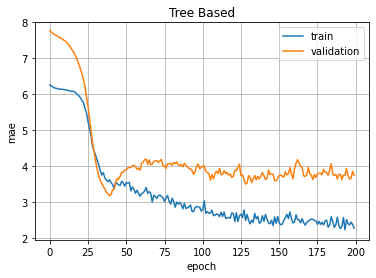

6/6 [==============================] - 0s 1ms/step - loss: 251.3824 - mae: 3.1760


[251.3824005126953, 3.1759533882141113]

In [14]:
"""
Resource 3
"""
plt.plot(history_feature3.history['mae'])
plt.plot(history_feature3.history['val_mae'])
plt.title('Tree Based')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_feature3 = model_feature3.evaluate(X_test3, y_test3, verbose=1)
score_feature3

### PCA

In [15]:
"""
Resource 2
"""
model_feature4 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_feature4 = model_feature4.fit(X_train4,
                                      y_train4,
                                      validation_split = 0.2,
                                      epochs=200,
                                      batch_size=5,
                                      verbose=1
                                     )

Epoch 1/200
117/117 [==============================] - 1s 2ms/step - loss: 921.3542 - mae: 6.2648 - val_loss: 846.1032 - val_mae: 7.7685

Epoch 00001: val_loss improved from inf to 846.10321, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 2/200
117/117 [==============================] - 0s 1ms/step - loss: 921.0167 - mae: 6.2277 - val_loss: 844.8660 - val_mae: 7.7179

Epoch 00002: val_loss improved from 846.10321 to 844.86603, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 915.2953 - mae: 6.1731 - val_loss: 838.8210 - val_mae: 7.6554

Epoch 00003: val_loss improved from 844.86603 to 838.82098, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 908.1135 - mae: 6.1548 - val_loss: 831.4495 - val

Epoch 29/200
117/117 [==============================] - 0s 2ms/step - loss: 390.5045 - mae: 4.2205 - val_loss: 311.9376 - val_mae: 4.4337

Epoch 00029: val_loss improved from 330.69617 to 311.93759, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 30/200
117/117 [==============================] - 0s 1ms/step - loss: 357.4583 - mae: 4.1292 - val_loss: 282.2337 - val_mae: 4.2179

Epoch 00030: val_loss improved from 311.93759 to 282.23370, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 31/200
117/117 [==============================] - 0s 2ms/step - loss: 343.1353 - mae: 4.0290 - val_loss: 261.9954 - val_mae: 4.0462

Epoch 00031: val_loss improved from 282.23370 to 261.99536, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 32/200
117/117 [==============================] - 0s 1ms/step - loss: 343.6653 - mae: 3.9647 - val_loss: 242.

117/117 [==============================] - 0s 1ms/step - loss: 54.8086 - mae: 2.2704 - val_loss: 463.4113 - val_mae: 4.0310

Epoch 00103: val_loss did not improve from 116.52535
Epoch 104/200
117/117 [==============================] - 0s 1ms/step - loss: 52.1635 - mae: 2.1661 - val_loss: 451.8815 - val_mae: 3.9680

Epoch 00104: val_loss did not improve from 116.52535
Epoch 105/200
117/117 [==============================] - 0s 1ms/step - loss: 40.3596 - mae: 2.0383 - val_loss: 451.5980 - val_mae: 3.9426

Epoch 00105: val_loss did not improve from 116.52535
Epoch 106/200
117/117 [==============================] - 0s 1ms/step - loss: 63.7095 - mae: 2.2737 - val_loss: 486.9174 - val_mae: 4.0604

Epoch 00106: val_loss did not improve from 116.52535
Epoch 107/200
117/117 [==============================] - 0s 1ms/step - loss: 69.0131 - mae: 2.3862 - val_loss: 479.3762 - val_mae: 4.0174

Epoch 00107: val_loss did not improve from 116.52535
Epoch 108/200
117/117 [==============================]

117/117 [==============================] - 0s 1ms/step - loss: 43.7064 - mae: 1.9707 - val_loss: 604.6204 - val_mae: 4.3649

Epoch 00146: val_loss did not improve from 116.52535
Epoch 147/200
117/117 [==============================] - 0s 1ms/step - loss: 60.4008 - mae: 2.1266 - val_loss: 590.1796 - val_mae: 4.3394

Epoch 00147: val_loss did not improve from 116.52535
Epoch 148/200
117/117 [==============================] - 0s 1ms/step - loss: 34.5908 - mae: 1.9011 - val_loss: 585.2962 - val_mae: 4.3356

Epoch 00148: val_loss did not improve from 116.52535
Epoch 149/200
117/117 [==============================] - 0s 1ms/step - loss: 48.3569 - mae: 2.1330 - val_loss: 584.3234 - val_mae: 4.3378

Epoch 00149: val_loss did not improve from 116.52535
Epoch 150/200
117/117 [==============================] - 0s 1ms/step - loss: 36.9931 - mae: 1.9468 - val_loss: 620.5919 - val_mae: 4.4900

Epoch 00150: val_loss did not improve from 116.52535
Epoch 151/200
117/117 [==============================]

117/117 [==============================] - 0s 1ms/step - loss: 32.7682 - mae: 1.7532 - val_loss: 467.7195 - val_mae: 4.0956

Epoch 00189: val_loss did not improve from 116.52535
Epoch 190/200
117/117 [==============================] - 0s 1ms/step - loss: 44.3939 - mae: 2.0015 - val_loss: 510.4042 - val_mae: 4.2322

Epoch 00190: val_loss did not improve from 116.52535
Epoch 191/200
117/117 [==============================] - 0s 1ms/step - loss: 35.8729 - mae: 1.8105 - val_loss: 489.0311 - val_mae: 4.1798

Epoch 00191: val_loss did not improve from 116.52535
Epoch 192/200
117/117 [==============================] - 0s 1ms/step - loss: 30.2224 - mae: 1.7505 - val_loss: 509.1613 - val_mae: 4.2406

Epoch 00192: val_loss did not improve from 116.52535
Epoch 193/200
117/117 [==============================] - 0s 1ms/step - loss: 43.6448 - mae: 2.0231 - val_loss: 545.5864 - val_mae: 4.3452

Epoch 00193: val_loss did not improve from 116.52535
Epoch 194/200
117/117 [==============================]

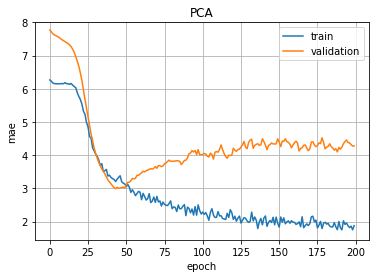

6/6 [==============================] - 0s 1ms/step - loss: 384.6692 - mae: 3.1910


[384.6692199707031, 3.190950393676758]

In [16]:
"""
Resource 3
"""
plt.plot(history_feature4.history['mae'])
plt.plot(history_feature4.history['val_mae'])
plt.title('PCA')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_feature4 = model_feature4.evaluate(X_test4, y_test4, verbose=1)
score_feature4

### Comparison

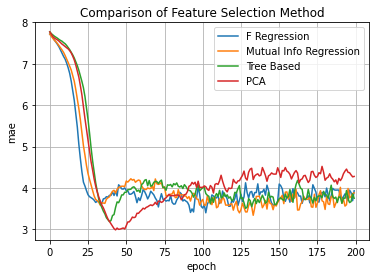

F Regression 2.596035957336426
Mutual Info Regression 2.5704758167266846
Tree Based 3.1759533882141113
PCA 3.190950393676758


In [17]:
plt.plot(history_feature1.history['val_mae'])
plt.plot(history_feature2.history['val_mae'])
plt.plot(history_feature3.history['val_mae'])
plt.plot(history_feature4.history['val_mae'])

plt.title('Comparison of Feature Selection Method')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['F Regression', 'Mutual Info Regression', 'Tree Based', 'PCA'], loc='upper right')
plt.ylim(top = 8)
plt.grid()
plt.show()

print('F Regression', score_feature1[1])
print('Mutual Info Regression', score_feature2[1])
print('Tree Based', score_feature3[1])
print('PCA', score_feature4[1])

Resources:
1. Keras Sequential model: https://keras.io/guides/sequential_model/
2. Train model: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
3. Display model training history: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/